CSCI 3104 Spring 2018

Problem Set 10



06/04/2017

# Problem Set 10
***

In [8]:
import pandas as pd
import numpy as np
import math

import matplotlib.pylab as plt
%matplotlib inline

### Problem 1

(15 pts total) A matching in a graph $G$ is a subset $E_M \subseteq E(G)$ of edges such that each vertex touches at most one of the edges in $E_M$. Recall that a bipartite graph is a graph $G$ on two sets of vertices, $V_1$ and $V_2$, such that every edge has one endpoint in $V_1$ and one endpoint in $V_2$. We sometimes write $G = (V_1, V_2; E)$ for this situation. For example:
<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-10/problem1_pics/example.PNG?raw=true" style="width:40%;height:40%;" >

The edges in the example consist of all the lines, whether solid or dotted; the solid lines form a matching.

The bipartite maximum matching problem is to find a matching in a given bipartite graph $G$, which has the maximum number of edges among all matchings in $G$.

***

(a) Prove that a maximum matching in a bipartite graph $G = (V_1, V_2; E)$ has size at most $\min\{|V_1|,|V_2|\}$.

The maximum matching problem allocates each vertex into a pair of vertices $(V_a, V_b)$ connected by an edge from $E_m$. Once a vertex has been paired, it **cannot** be connected to any other vertex by an edge from $E_m$. For two sets of vertices [$V_1, V_2$], there can't be any other edges added to $E_m$ once the smaller set of vertices have been completely matched because a vertex from the smaller set would then have more than one edge. Therefore, there can only be at most $\min\{|V_1|,|V_2|\}$ edges in $E_m$.

***

(b) Show how you can use an algorithm for max-flow to solve bipartite maximum
matching on undirected simple bipartite graphs. That is, give an algorithm which, given an undirected simple bipartite graph $G = (V_1, V_2; E)$ :

**1)** constructs a directed and weighted graph $G'$ (which need not be bipartite) with weights $w : E(G') \rightarrow \mathbb{R}$ as well as two vertices $s, t \in V(G');$ 

**2)** solves max-flow for $(G',w), s, t$ 

**3)** uses the solution for max-flow to find the maximum matching in $G$. 

Your algorithm may use any max-flow algorithm as a subroutine.

***

**given graph** $G$
<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-10/problem1_pics/given.jpg?raw=true" style="width:25%;height:25%;" >

*My algorithm for solving bipartite max matching using max-flow would utilize ford-fulkerson as a subroutine.*

1) The algo first creates $s,t$ edges where $s$ has edges that connect to $V_1$ and $t$ has edges to $V_2$. Next it assigns weights to each edge. In this example, the weights will be randomly generated numbers between 1 and 10 (in real applications, the weights could represent flow of water in lbs or even the percentage match of a person to a job). The algo would also assign directions to the graph. In this case, the direction of the edges will all be towards $t$.
<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-10/problem1_pics/1_gprime.jpg?raw=true" style="width:30%;height:30%;" >


2) The algorithm would then solve for max-flow using ford-fulkerson. The greedy algorithm would choose a s-t path that has the greatest weight; however, the algo would also check both that each vertex in $(V_1,V_2)$ have at max one edge connecting them and that the number of paths between $(V_1,V_2)$ does not exceed $\min\{|V_1|,|V_2|\}$.
<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-10/problem1_pics/2_maxflow.jpg?raw=true" style="width:30%;height:30%;" >

3) Using the solution from the max-flow, my algorithm adds the edges from the solution paths to $E_m$ which represents the edges that solve bipartite max matching in $G$.
<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-10/problem1_pics/3_maxmatch.jpg?raw=true" style="width:25%;height:25%;" >

***

(c) Show the weighted graph constructed by your algorithm on the example bipartite graph above.

ORIGINAL
<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-10/problem1_pics/example.PNG?raw=true" style="width:40%;height:40%;" >

Using Algorithm
<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-10/problem1_pics/examplegraph.jpg?raw=true" style="width:35%;height:35%;" >

By giving weight **1** to the dark lines and **0** to the dotted lines, my algorithm identifies the max-flow through the weighted lines and stops assigning lines to $E_m$ once their is $\min\{|V_1|,|V_2|\}$ edges.

***

### Problem 2

(20 pts total) In the review session for his Deep Wizarding class, Dumbledore reminds everyone that the logical definition of NP requires that the number of bits in the witness $w$ is polynomial in the number of bits of the input $n$. That is, $|w| = poly(n)$. With a smile, he says that in beginner wizarding, witnesses are usually only logarithmic in size, i.e., $|w| = O(\log n)$.

(a) Because you are a model student, Dumbledore asks you to prove, in front of the whole class, that any such property is in the complexity class P.

In general, $P \subseteq NP$ which means that any $w$ that can be solved in NP can be solved in P. For any $w$ with input $n$ in the logical definition of NP, $|w| = poly(n)$. A basic example that shows $|w| = O(\log n)$ is solving for a numbers greatest common divisor; where $n=2$ for the two integer inputs and $w$ is their gcd. Solving for the gcd would be $O(logn)$ based on the number of inputs which is in Polynomial time. Any such property that is a subset of NP is in the complexity class P.

***

(b) Well done, Dumbledore says. Now, explain why the logical definition of NP implies that any problem in NP can be solved by an exponential time algorithm.

Exponential time means that every possible type of witness is used to solve the problem. In other words, **any** problem can be solved in exponential time. Because $P \subseteq NP \subseteq Exp$, any problems that can be solved in NP can be solved in exponential time.

***

(c) Dumbledore then asks the class: "So, is NP a good formalization of the notion of problems that can be solved by brute force? Discuss.'' Give arguments for both possible answers.

No  - A better formalization of this notion is that Exponential Time encompasses problems that can be solved by pure brute force.  

Yes - The range of questions that can be solved by NP can also be solved by EXP (by the same logic in part b), therfore they can be nearly solved in the same brute force method.

***

### Problem 3

(30 pts total) The Order of the Phoenix is trying to arrange to watch all the corridors in Hogwarts, to look out for any Death Eaters. Professor McGonagall has developed a new spell, Multi-Directional Sight, which allows a person to get a 360-degree view of where they are currently standing. Thus, if they are able to place a member of the Order at every intersection of hallways, they'll be able to monitor all hallways. In order not to spare any personnel, they want to place as few people as possible at intersections, while still being able to monitor every hallway. (And they really need to monitor every hallway, since Death Eaters could use Apparition to teleport into an arbitrary hallway in the middle of the school.) Call a subset $S$ of intersections is **safe**, if, by placing a member of the Order at each intersection in $S$, every hallway is watched.

(a) Formulate the above as an optimization problem on a graph. Argue that your formulation is an accurate reflection of the problem. In your formulation, show that the following problem is in NP: Given a graph $G$ and an integer $k$, decide whether there a safe subset of size $\leq k$.

For the above problem, we can formulate a graph where edges represent hallways in hogwarts and vertices represent the intersections where wizards can be placed. In this model, wizards at a vertex can monitor all edges (hallways) that are connected to it, but they cannot monitor edges connected to other vertices. 

In a graph G given arbitary integer k, there can be up to $2^k$ subsets of graphs with varying vertices and edges. Determining out of all subsets in a graph that there is at least one $(size \leq k)$ that has enough nodes to safely cover the edges in the subset **cannot** be solved in log(n) time. This means that it is a problem in NP.

***

(b) Consider the following greedy algorithm to find a safe subset:

    S = empty
    mark all hallways unwatched
    while there is an unwatched intersection
        pick any unwatched hallway; let u,v be its endpoints
        add u to S
        for all hallways h with u as one of its endpoints
            mark h watched
        end
    end
    
Although this algorithm need not find the minimum number of people needed to cover all hallways, prove that it always outputs a safe set, and prove that it always runs in polynomial time.

This greedy algorithm takes an unwatched hallway, marks one of it's vertices $u$ as watched, then adds all other hallways attached to $u$ to the marked set. The algorithm repeats as long as their are vertices not in S. In order to be considered a safe set, all hallways must be marked as watched. Because the algorithm will not exit until every node is marked as watched, it must always return a safe set.

The best case running-time for this algorithm would be O(1) if there were minimum edges in the graph. The worst case running time if the graph had $E$ edges would be $O(E^2)$, because the algo would go through every edge in the graph and it's connected nodes. The input of our algo is a polynomial that represents the number of vertices in the graph $V$. The number of Edges in the graph is at *most* $V^2$ if every node has an edge to every other node. Therefore, since E is a polynomial, $O(E^2)$ runs in polynomial time.

***

(c) Note that, in order to be polynomial-time, an algorithm for this problem cannot simply try all possible subsets of intersections. Prove why not.

In order to solve the problem by trying all possible subsets, we would be solving a problem $O(2^V)$ where V is a polynomial that represents the number of vertices input to the algo. This solution cannot be polynomial time because the big O time is taking a constant to the power of a polynomial which is in NP.

***

(d) Give an example where the algorithm from 3b outputs a safe set that is strictly larger than the smallest one. In other words, give a graph $G$, give a list of vertices in the order in which they are picked by the algorithm, and a safe set in $G$ which is strictly smaller than the safe set output by the algorithm.

<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-10/problem3_pics/partd.jpg?raw=true" style="width:35%;height:35%;" >

The above graph represents an optimal safe set that is smaller than the output of the algo from (b). The black node has a wizard placed there who monitors the edges, while the white nodes are empty. The output of the algorithm would take the nodes on the outside and place wizards in them to monitor the inner hallways. The output of the algorithm would be much bigger than the optimal solution because it would place more wizards than nessecary.

***

(e) Consider the following algorithm:

    S = empty
    mark all hallways unwatched
    while there is an unwatched hallway
        pick any unwatched hallway; let u,v be its endpoints
        add u,v to S
        for all hallways h with u or v one of their endpoints
            mark h watched
        end
    end
    
Although this algorithm need not find the minimum number of people needed to cover all hallways, prove that it always outputs a safe set, and prove that it always runs in polynomial time.

This algorithm is similar to the one in (b), but it adds wizards to both ends of the unwatched hallway in the first loop and then marks all hallway's attached to both wizards. Essentially, the task of both is being accomplished slightly different. The worst case runtime for this algorithm is the same as (b), which is $O(E^2)$. Because the number of edges in the graph is polynomial, then the running time $O(E^2)$ is in polynomial time. (same logic in part b)

***

(f) In any safe set of intersections, each hallway is watched by at least one member of the Order. Use this to show that the algorithm from 3e always outputs a safe set whose size is no more than twice the size of the smallest safe set. Note: you don't need to know what the smallest safe set is to prove this! All you need is the fact stated here.
This is called a 2-approximation algorithm, because it is guaranteed to output a solution that is no worse than a factor of 2 times an optimal solution.

Because the algorithm in (e) adds wizards at each end of the hallway, more hallways will be covered during the loop so there will be less wizards placed down than the previous algorithm. Using the example graph from (d), the algorithm would choose an outer node to mark first, then would mark the middle node. At this point, all hallways would be watched and we only placed twice the amount of wizards than the optimal.

***

(g) Does the algorithm from 3b always produce a safe set no bigger than that produced by the algorithm in 3e? If so, give a proof; if not, give a counterexample. A counterexample here consists of a graph, and for each algorithm, the list of vertices it chooses in the order it chooses them, such that the safe set output by algorithm 3b is at least as large as the safe set output by algorithm 3e. If you are unable to give either a proof or a counterexample, then for partial credit give a plausible intuitive argument for your answer.

**No**, the (3b) algorithm would produce safe sets twice as big as the algo from (3e). 

(h) Compare the greedy algorithm from 3e with the greedy algorithm from 3b. Show which runs faster asymptotically? Which of these two algorithms would you rather use to solve the Order of the Phoenix's problem and why?

(i) This problem is, in fact, NP-complete. Why does the 2-approximation polynomial-time algorithm from 3e not show that P=NP?

### Problem 4

(20 pts extra credit) Every young wizard learns the classic NP-complete problem of determining whether some unweighted, undirected graph $G = (V,E)$ contains a simple path of length at least $k$ (where both $G$ and $k$ are part of the input to the problem), known as the Longest Path Problem. Recall that a simple path is a path $(v_1, v_2, ... , v_\ell)$ where each $(v_i, v_{i+1})$ in the path is an edge, and all the $v_i$ are distinct; its length is $\ell-1$ (=the number of edges in the path).

### Problem 5

(20 pts extra credit) Recall that the MergeSort algorithm (Chapter 2.3 of CLRS) is a sorting algorithm that takes $\Theta(n \log n)$ time and $\Theta(n)$ space. In this problem, you will implement and instrument **MergeSort**, then perform a numerical experiment that verifies this asymptotic analysis. There are two functions and one experiment to do this.

**MergeSort(A, n)** takes as input an unordered array $A$, of length $n$, and returns both an in-place sorted version of $A$ and a count $t$ of the number of atomic operations performed by **MergeSort**.


**randomArray(n)** takes as input an integer $n$ and returns an array $A$ such that for each $0 \leq i < n$, $A[i]$ is a uniformly random integer between 1 and $n$. (It is okay if $A$ is a random permutation of the first $n$ positive integers; see the end of Chapter 5.3.)


(a) From scratch, implement the functions **MergeSort** and **randomArray**. You may not use any library functions that make their implementation trivial. You may use a library function that implements a pseudorandom number generator in order to implement **randomArray**.

Submit a paragraph that explains how you instrumented **MergeSort**, i.e., explain which operations you counted and why these are the correct ones to count.

In [39]:


def randomArray(n):
    A = np.random.uniform(1, n, size=n)
    return A

def merge(A, left, mid, right, count):
    p = []
    
    L = MergeSort(A[:mid])
    R = MergeSort(A[mid:])
    
    lengthL = len(L)
    lengthR = len(R)
    
    count += 4
    
    while lengthL != 0 and lengthR != 0:
        
        if L[0] < R[0]:
            p.append(L[0])
            L.remove(L[0])
            count += 3
            
        else:
            p.append(R[0])
            R.remove(R[0])
            count += 2
    #end while
            
    if lengthL == 0:
        p += R
        count += 3
    else:
        p += L
        count += 1
        
    return p, count
#end merge

def MergeSort(A, n, count):
    
    mid = math.floor(n/2)
    left = len(A[:mid])
    right = len(A[mid:])
    count += 1
    
    if (left < right):
        MergeSort(A, left, count)
        MergeSort(A, right, count)
        A, count = merge(A, left, mid, right, count)
        
    return (A, count)

I implemented merge sort by constructing an array out of the left and right parts of the original array. This algorithm operates recursively. I counted the atomic operations by adding up the number of append, remove, and equals operations in the merge function.

***

(b) For each of $n = \{2^4,2^5,...,2^{26},2^{27}\}$, run **MergeSort(randomArray(n),n)** and record the tuple $(n, \left<t\right>)$, where $\left<t\right>$ is the average number of operations your function counted over the five repetitions. Use whatever software you like to make a line plot of these 24 data points; overlay on your data a function of the form $T(n) = An\lg n$, where you choose the constant $A$ so that the function is close to your data.

Hint: To increase the aesthetics, use a log-log plot.

Trial:  16 - 0
Trial:  16 - 1
Trial:  16 - 2
Trial:  16 - 3
Trial:  16 - 4
Trial:  32 - 0
Trial:  32 - 1
Trial:  32 - 2
Trial:  32 - 3
Trial:  32 - 4
Trial:  64 - 0
Trial:  64 - 1
Trial:  64 - 2
Trial:  64 - 3
Trial:  64 - 4
Trial:  128 - 0
Trial:  128 - 1
Trial:  128 - 2
Trial:  128 - 3
Trial:  128 - 4
Trial:  256 - 0
Trial:  256 - 1
Trial:  256 - 2
Trial:  256 - 3
Trial:  256 - 4
Trial:  512 - 0
Trial:  512 - 1
Trial:  512 - 2
Trial:  512 - 3
Trial:  512 - 4
Trial:  1024 - 0
Trial:  1024 - 1
Trial:  1024 - 2
Trial:  1024 - 3
Trial:  1024 - 4
Trial:  2048 - 0
Trial:  2048 - 1
Trial:  2048 - 2
Trial:  2048 - 3
Trial:  2048 - 4
Trial:  4096 - 0
Trial:  4096 - 1
Trial:  4096 - 2
Trial:  4096 - 3
Trial:  4096 - 4
Trial:  8192 - 0
Trial:  8192 - 1
Trial:  8192 - 2
Trial:  8192 - 3
Trial:  8192 - 4
Trial:  16384 - 0
Trial:  16384 - 1
Trial:  16384 - 2
Trial:  16384 - 3
Trial:  16384 - 4
Trial:  32768 - 0
Trial:  32768 - 1
Trial:  32768 - 2
Trial:  32768 - 3
Trial:  32768 - 4
Trial:  65536 -

C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


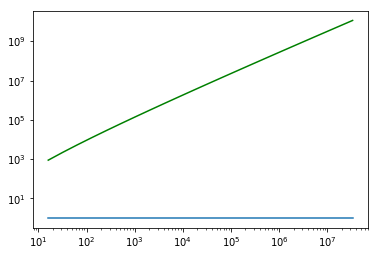

In [37]:

def sim(n):
    count = 0
    
    averages = []
    trials = [2**i for i in range(4, n)]

    model = [14 * (j * np.log2(j)) for j in trials]


    for i in trials: #2^(4-26)
        sum = 0
        for j in range(0, 5):
            print("Trial: ", i, "-", j)
            sum += MergeSort(randomArray(i), i, count)[1]
        #end for j
        averages.append(sum/5)
    #end for i
    
    print(averages)
    
    plt.loglog(trials, averages)
    plt.loglog(trials, model, color='green')
    plt.show()
    

sim(26)

## Collaborators


George Allison

Sofie Mehrotra

Krish Dholakiya

Gustav Solis